In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=z*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

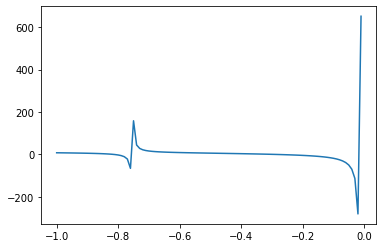

In [34]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 0, np.sqrt(40)))

In [49]:
continuidad(-0.9999, 1, np.sqrt(40))

8.459971947488583

In [38]:
from sympy import *
x=Symbol('x')
ans=solve(continuidad(x,0,np.sqrt(40)))
print(ans)

ModuleNotFoundError: No module named 'sympy'

In [5]:
def hallarCeros(f,l, rho,toi=0.0005):
    g=np.arange(-1,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 1, np.sqrt(40))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


array([-0.63 , -0.006])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[0. 0. 1. 1. 2. 3.] [-32.72 -12.   -25.2   -0.24 -15.96  -5.24]
[0. 0. 1. 1. 2. 3. 4.] [-42.5  -20.7  -34.7   -7.   -25.05 -13.7   -0.9 ]
[0. 0. 1. 1. 2. 2. 3. 4.] [-52.32 -29.82 -44.34 -15.24 -34.38  -0.18 -22.56  -9.18]
[0. 0. 1. 2. 2. 3. 4. 5.] [-39.13  -4.34 -23.94 -43.82  -7.49 -31.78 -17.92  -2.52]
[0. 0. 1. 2. 3. 4. 5.] [-48.56 -11.92 -32.96 -15.76 -41.12 -26.96 -11.04]


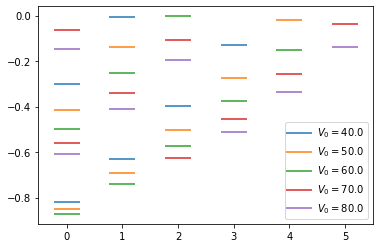

In [33]:
plt.figure()
rho=np.sqrt(np.arange(40,90,10))
l=np.arange(0,6,1)
energy=np.zeros((len(rho), len(l)))
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y*rho[i]**2)
    plt.scatter(x,y, s=700, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()        

In [43]:
np.concatenate?

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 

In [51]:
def bisection(a,b,f,l, rho,toi=1E-6):
    xl=a
    xr=b
    while(np.abs(xl-xr)>=toi):
        c=(xl+xr)/2.0
        prod=f(xl, l,rho)*f(c, l, rho)
        if prod>toi:
            xl=c
        else:
            if prod<toi:
                xr=c
    return c            

In [ ]:
bisection(-0.999,0, continuidad, 6, 10)

In [ ]:
rho=np.sqrt(np.arange(10,100,10))
l=np.arange(0,11,1)
energias=np.zeros((len(rho), len(l)))

In [ ]:
for i in range(len(rho)):
    for j in range(len(l)):
        energias[i][j]=bisection(-0.99999,0, continuidad, l[j], rho[i])
energias

In [ ]:
energias[1]

In [ ]:
plt.plot(l, energias[1])

In [ ]:
energias[:,1]

In [ ]:
plt.plot(rho, energias[:,0])

In [ ]:
def aproximada(x, l, rho):
    y=np.tan(rho*np.sqrt(1+x)-np.pi*l/2.0)+np.sqrt(1+x/(-x))
    return y

In [ ]:
plt.figure()
plt.plot(x, aproximada(x,6,40))

In [26]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=-1j*rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,1j*z)
    f=-g/h
    return f
    

In [27]:
def sigma(x, rho):
    s=0
    for i in range(10):
        d=tanDl(x,i,rho)/(np.sqrt(1+tanDl(x,i,rho)**2))
        s+=-4*np.pi*(2*i+1)*(d*d.conjugate())/(rho**2*x)
    return s

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


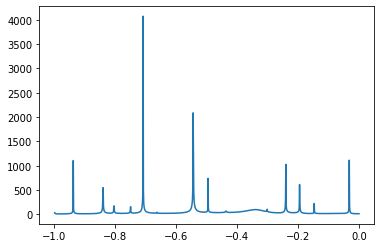

In [37]:
x=np.arange(-1,0.0,0.001)
plt.figure()
plt.plot(x, sigma(x,np.sqrt(70)))

In [32]:
x[sigma(x,np.sqrt(40))>1000]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([-0.721, -0.496, -0.488, -0.487, -0.332, -0.154])

In [22]:
x

array([0.9999])